# Tech Blues Capstone
## First Draft Notebook

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle2
import explore2
import tyler_explore

## Project Overview

## Project Planning

## Data Acquisition

In [2]:
# use our 'get_survey_data' function to bring in the data
df = wrangle2.get_survey_data('survey2.csv')

In [3]:
# checking to see if there are any duplicate rows
test_df = df.duplicated()
test_df.value_counts()

False    1259
dtype: int64

In [4]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
# wrangle2.summarize(df)

------

# Acquire Key Findings, Takeaways, and Next Steps:
- Good amount of nulls to drop or fill in 
- Choose to change some of the object datatypes to numeric datatype, decide what to drop, or decide what to use in modeling
- columns to encode to numeric datatype: gender, Country, self_employed, family history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys-health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence
- drop unnecassary columns: state and comments




------

## Data Preparation

In [5]:
# initial prep for object data
strings_df = wrangle2.prep_the_strings(df)
# strings_df.info()

In [6]:
strings_df.phys_health_consequence.value_counts()

No       722
Maybe    193
Yes       42
Name: phys_health_consequence, dtype: int64

In [7]:
# initial prep for encoding objects into integers
encoded_df = wrangle2.prep_encode(strings_df)
# encoded_df.info()

**To prep this data before exploration, the following was done:**

|   Feature      | Description    | Encoding |
| :------------- | ----------- | -----------: |
| timestamp	|  Time survey was submitted | - |
| age	| Respondent age  | - |
| gender	| Respondent gender | male:0, female:1, other:2 |
| country	 |  Respondent survey  | Only kept N America and Europe |
| self_employed	 | Whether or not they were self employed | No:0, Yes:1 |
| family_history	| Whether or not they have a family history of mental illness | No:0, Yes:1 |
| treatment	 |  Whether or not they have sought treatment  | No:0, Yes:1 |
|  work_interfere	  |  If the person felt that the mental condition interfered with work | Never:0, Rarely:1, Sometimes:2, Often:3, NA:4 |
| no_employees	| The number of employees in the company or organization  | <5:0, 6-25:1, 26-100:2, 101-500:3, 501-1000:4, >1000:5 |
| remote_work	 | Having remote work (outside of an office) at least 50% of the time | No:0, Yes:1 |
| tech_company	| The employer is primarily a tech company/organization | No:0, Yes:1 |
| benefits  |	Providing mental health benefits by the employer | No:0, Yes:1, Don't know:2 |
| care_options |	Providing options for mental health care by the employer | No:0, Yes:1, Not sure:2 |
| wellness_program	| Discussion about mental health as part of an employee wellness program by the employees | No:0, Yes:1, Don't know:2 |
| seek_help	| Provided resources by the employer to learn more about mental health issues and how to seek help | No:0, Yes:1, Don't know:2 |
| anonymity |	Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources | No:0, Yes:1, Don't know:2 |
| leave  |	How easy is it for you to take medical leave for a mental health condition? | Very difficult:0, Somewhat difficult:1, Don't know:2, Somewhat easy:3, Very easy:4 |
| mental-health_consequence |	Having negative consequences caused by discussing a mental health issue with your employer | No:0, Yes:1, Maybe:2 |
| phys-health_consequence	 | Having negative consequences caused by discussing a physical health issue with your employer  | No:0, Yes:1, Maybe:2 |
| coworkers |	Would you be willing to discuss a mental health issue with your coworkers? | No:0, Yes:1, Some of them:2 |
| supervisor	| Would you be willing to discuss a mental health issue with your direct supervisor(s)? | No:0, Yes:1, Some of them:2 |
| mental_health_interview  |	Would you bring up a mental health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| phys_health_interview |	Would you bring up a physical health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| mental_vs_physical |	Do you feel that your employer takes mental health as seriously as physical health? | No:0, Yes:1, Don't know:2 |
|  obs_consequence  |  Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  | No:0, Yes:1 |

------

### Data Preparation Key Findings, Takeaways, and Next Steps:

- Chose to only include North America and Europe in our dataset: The economic status in these two countries are similar and this will give us more controlled variables with less bias in the data.
- The cleaning process had a moderate amount of nulls that needed to filled in or dropped 
- Deciding on what to fill nulls for each column was dependent on the column we were dealing with as you can see in the cell above.
- Initially decided to not one hot encode: will decide which columns to one hot encode once we find what features are drivers and what features are not.

------

## Data Exploration
### 1st Iteration
The first iteration will be performed on encoded data, before deciding which variables to one-hot encode before the second iteration of data exploration.

### Univariate

In [8]:
# first let's split the data...

# encoded data
encoded_train, encoded_validate, encoded_test = explore2.three_split(encoded_df, 'work_interfere')

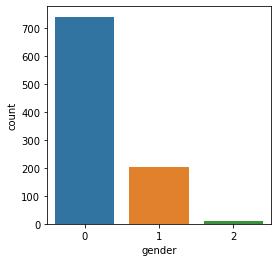

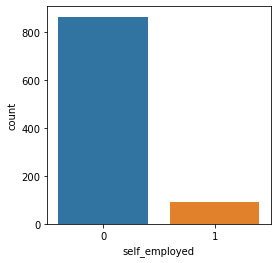

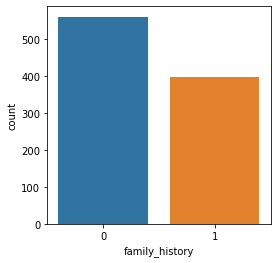

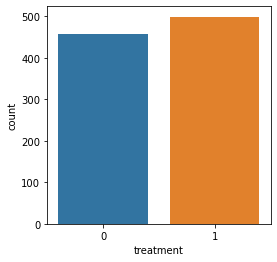

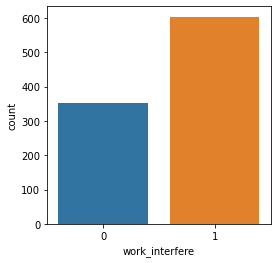

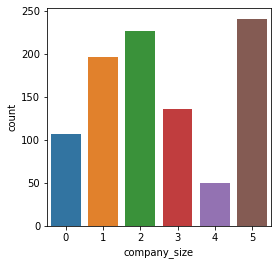

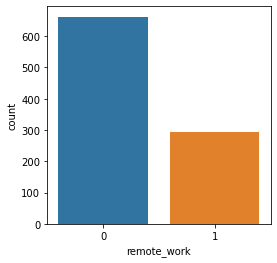

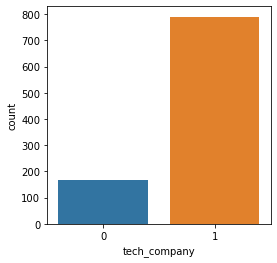

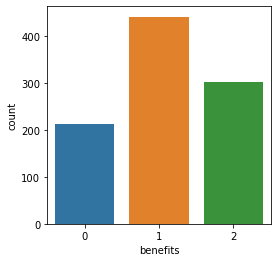

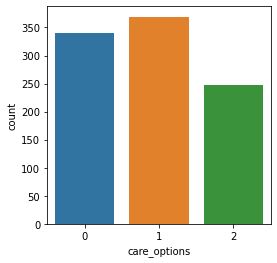

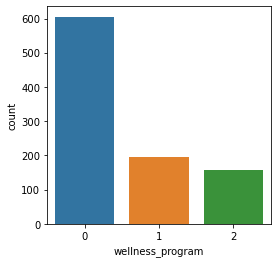

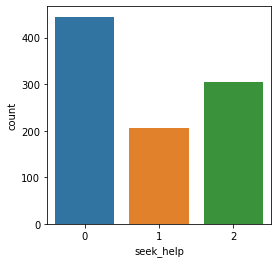

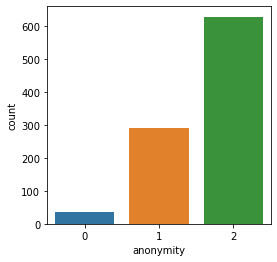

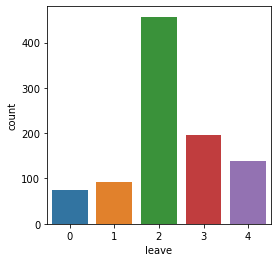

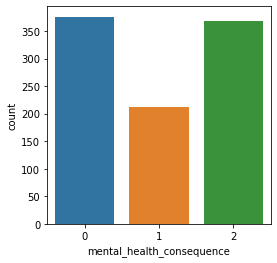

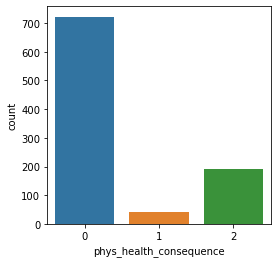

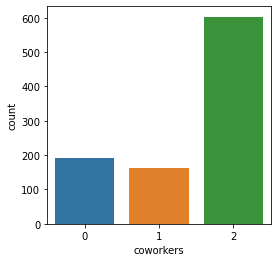

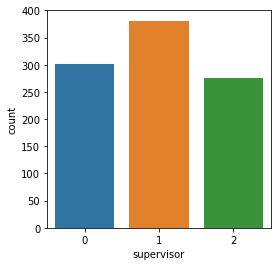

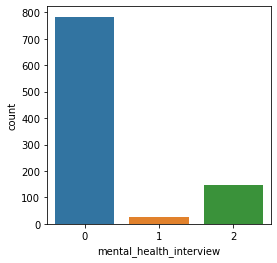

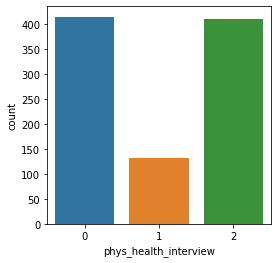

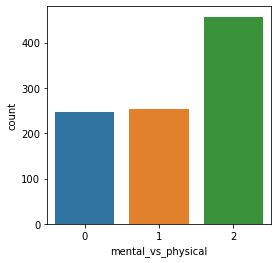

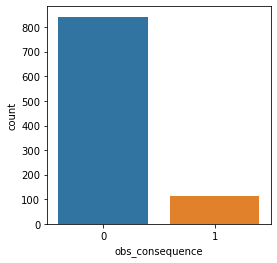

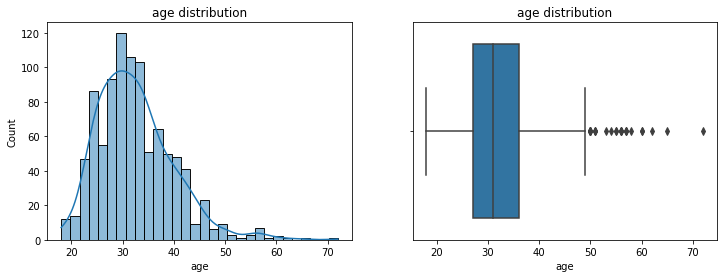

In [9]:
# countplots of categorical variables
# histograms and bosplots of continuous variables
explore2.mental_health_univariate(encoded_df)

#### Univariate 1st Iteration - Key Findings, Takeaways, and Next Steps:
- `gender` is heavily imbalanced, with 70% of respondents being male. What kind of impact will this have? Are men more/less likey to seek treatment and/or have mental health issues that lead to workplace interference?
- `self-employed` is also heavily imbalanced, with only 10% reporting being self-employed. Does this group have more/less issues than those working for others?
- `family_history` is 60% no history, 40% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split. Will be very interested to see if this is a driver - Does receiving treatement lead to more or less interference?
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-fifth not receiving any, and one-third unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` has 60% not having a wellness program, and 20% each either having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` has 40% not receiving help/resources from their company, and 30% receiving help, and 20% unsure.
- `anonymity` shows an overwhelming majority of respondents who are unsure if they would be able to remain anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` shows most either do not think their would be consequences, or are unsure
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 5% worry about consequences, and 20% are unsure. We are really interested to see what leads to these differences.
- `coworkers` shows an overwhelming majority are unsure if they would be comfortable speaking with coworkers about personal mental health issues.
- `supervisor` shows another stark contrast where most do feel comfortable speaking with a supervisor about mental health issues, even though they are unsure about speaking with coworkers.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` shows an equal amount of yes and no responses, with a larger portion of unsure. These groups definitely need to be looked into.
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

### Bivariate

In [10]:
# encoded_bi_metrics = explore2.mental_health_bivariate(encoded_train, 'work_interfere')

#### Bivariate 1st Iteration - Key Findings, Takeaways, and Next Steps:

### 2nd Iteration
The second iteration will be performed on the one-hot encoded data, before deciding what other feature engineering we would like to perform before the third iteration of data exploration.

In [11]:
# one-hot encode the data
hot_df = explore2.one_hot(encoded_df)

In [12]:
# looking for largest groups in the data...
col_list = list(hot_df.columns)

In [13]:
# dropping 'age' from col_list
col_list = col_list[1:]

In [14]:
# dropping age from the dataframe
hot_cats = hot_df.drop(columns=('age'))

In [15]:
def largest_group(df, col_list):
    totals_dict = {'variable': [], 'count': []}
    
    for col in col_list:
        totals_dict['variable'].append(col)
        totals_dict['count'].append(df[col].sum())
        totals_df = pd.DataFrame(totals_dict)
        totals_df = totals_df.sort_values('count', ascending=False)
    return totals_df

In [16]:
hot_cats['gender_0'].sum()

741

In [17]:
totals_df = largest_group(hot_cats, col_list)
totals_df.head(10
            )

,variable,count
42,mental_health_interview_0,783
1,gender_0,741
33,phys_health_consequence_0,722
29,anonymity_2,629
21,wellness_program_0,605
0,work_interfere,604
38,coworkers_2,603
12,leave_2,457
50,mental_vs_physical_2,457
24,seek_help_0,445


In [18]:
# split the one-hot encoded data
hot_train, hot_validate, hot_test = explore2.three_split(hot_df, 'work_interfere')

In [19]:
# hot_df.columns

In [20]:
# univariate exploration on one-hot encoded data

# explore2.mental_health_univariate(hot_df)

#### Univariate 2nd Iteration - Key Findings, Takeaways, and Next Steps:

### Bivariate

In [21]:
# hot_bi_metrics = explore2.mental_health_bivariate(hot_train, 'work_interfere')

In [22]:
# one-hot encode the data (drop_first)
hottest_df = explore2.two_hot(encoded_df)

In [23]:
# split the one-hot encoded data
hottest_train, hottest_validate, hottest_test = explore2.three_split(hottest_df, 'work_interfere')

In [24]:
# hottest_bi_metrics = explore2.mental_health_bivariate(hottest_train, 'work_interfere')

In [25]:
# first I am going to limit my exploration to variables with a p-value < 0.1

# toppest_df = hottest_bi_metrics[hottest_bi_metrics['p-value']<0.1]

In [26]:
# toppest_list = list(toppest_df['variable'])
# toppest_list

### Multivariate

In [27]:
# first I am going to limit my exploration to variables with a p-value < 0.1

# top_df = hot_bi_metrics[hot_bi_metrics['p-value']<0.1]

In [28]:
# top_list = list(top_df['variable'])
# top_list

In [29]:
# multi_2 = hot_train[top_list]

In [30]:
# col_list = list(multi_2.columns)

# for col in col_list:
#     print(multi_2[col].value_counts())

In [31]:
# work_for_me = hot_df[hot_df['mental_health_interview_0']==1]

In [32]:
# explore2.mental_health_bivariate(work_for_me, 'work_interfere')

#### Multivariate - Key Findings, Takeaways, and Next Steps:

### Hypothesis Testing
#### Target Variable: 'work_interfere'

#### Hypothesis 1: 'Supervisor'
- alpha : 0.05
- ${H_0}$: The mean workplace interference is the same for those who feel comfortable speaking with their supervisor about mental health issues, and those who do not feel comfortable.
- ${H_a}$: The mean workplace interference is different for those who feel comfortable speaking with their supervisor about mental health issues than those who do not feel comfortable communicating those issues with their supervisor.

#### Hypothesis 1 - Key Findings, Takeaways, and Next Steps:
- Due to our p-value being less than alpha, we reject the null hypothesis.
- There is evidence to suggest a relationship between feeling comfortable speaking with a supervisor about personal mental health issues and our target variable, 'work_interfere'

In [33]:
def ty_chi(df, target, col_2):
    '''
    This function takes in a pandas dataframe, along with two columns. It runs a chi2_contingency on the two columns and prints out the column names, chi2 score, and p-value.
    '''
    
    observed = pd.crosstab(df[target], df[col_2])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    print(f'{target} & {col_2} chi2 test results')
    print('')
    print(f'chi^2 = {chi2:.2f}')
    print(f'    p = {p:.4f}')

In [34]:
ty_chi(encoded_train, 'work_interfere', 'supervisor')

work_interfere & supervisor chi2 test results

chi^2 = 15.60
    p = 0.0004


In [35]:
ty_chi(encoded_train, 'work_interfere', 'gender')

work_interfere & gender chi2 test results

chi^2 = 13.21
    p = 0.0014


In [36]:
def three_chi(df, control, target, col_2):
    '''
    This function takes in a pandas DataFrame, a control variable, target_variable, and other variable.
    It creates separate DataFrames that control for the control variable.
    '''
    length = len(df[control].value_counts())
    span = range(0,length)
    
    for i in span:
        sub_df = df[df[control]==i]
        observed = pd.crosstab(sub_df[target], sub_df[col_2])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print(f'controlling for {control} = {i}')
        print('')
        print(f'{target} & {col_2} chi2 test results')
        print('')
        print(f'chi^2 = {chi2:.2f}')
        print(f'    p = {p:.4f}')
        print('')
        print('-----------------------------------')

In [37]:
def three_chi(df, control, target, col_2):
    '''
    This function takes in a pandas DataFrame, a control variable, target_variable, and other variable.
    It creates separate DataFrames that control for the control variable.
    '''
    length = len(df[control].value_counts())
    span = range(0,length)
    
    for i in span:
        sub_df = df[df[control]==i]
        print(f'Controlling for {control} = {i}')
        print('')
        ty_chi(sub_df, target, col_2)
        print('')
        print('------------------------------------')
    sns.catplot(data=df, x=col_2, hue=target, col=control, kind='count', height=4, aspect=.7)

In [38]:
encoded_train.columns

Index(['unnamed: 0', 'timestamp', 'age', 'gender', 'country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'company_size',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [39]:
col_list = ['gender', 'self_employed',
       'family_history', 'company_size',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

Controlling for treatment = 0

work_interfere & gender chi2 test results

chi^2 = 0.04
    p = 0.8336

------------------------------------
Controlling for treatment = 1

work_interfere & gender chi2 test results

chi^2 = 0.63
    p = 0.7305

------------------------------------
Controlling for treatment = 0

work_interfere & self_employed chi2 test results

chi^2 = 0.64
    p = 0.4244

------------------------------------
Controlling for treatment = 1

work_interfere & self_employed chi2 test results

chi^2 = 0.15
    p = 0.6955

------------------------------------
Controlling for treatment = 0

work_interfere & family_history chi2 test results

chi^2 = 6.00
    p = 0.0143

------------------------------------
Controlling for treatment = 1

work_interfere & family_history chi2 test results

chi^2 = 2.02
    p = 0.1553

------------------------------------
Controlling for treatment = 0

work_interfere & company_size chi2 test results

chi^2 = 10.49
    p = 0.0626

--------------------

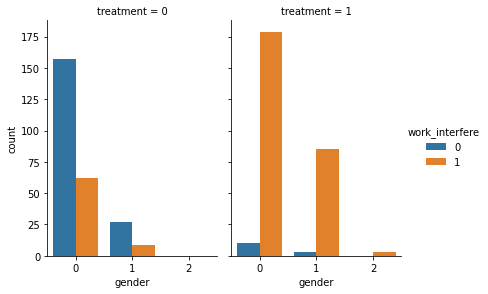

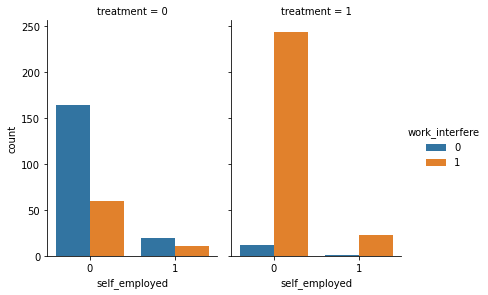

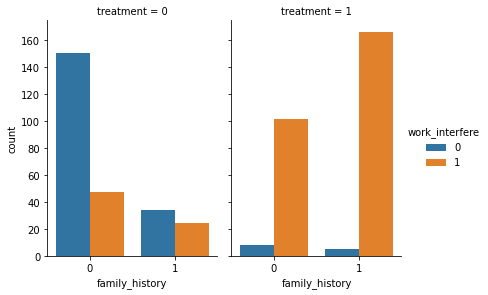

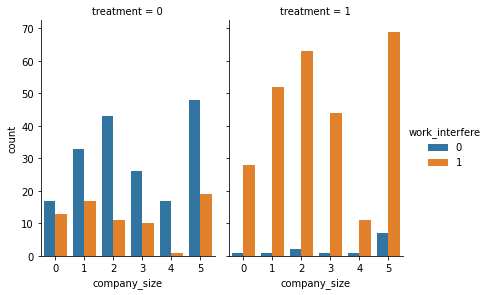

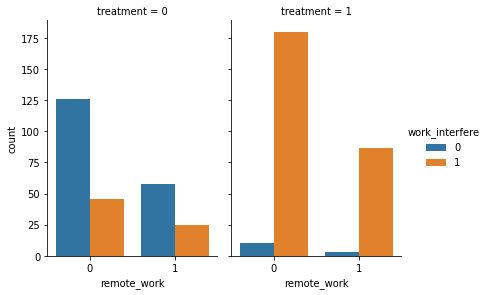

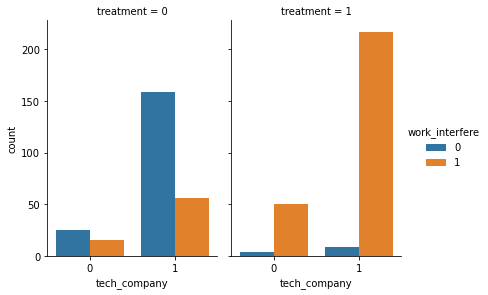

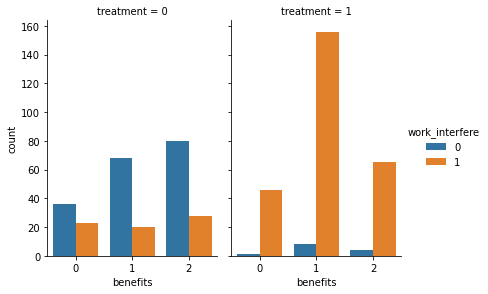

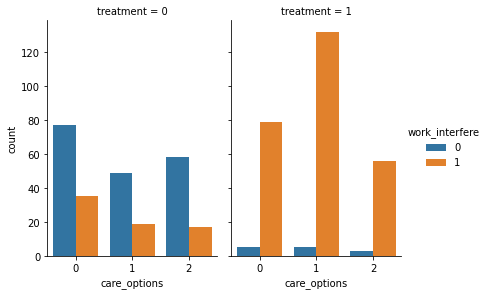

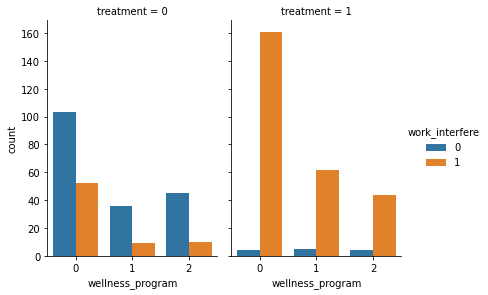

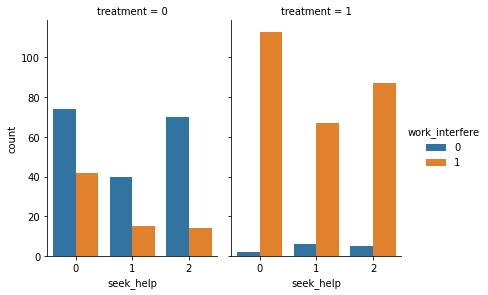

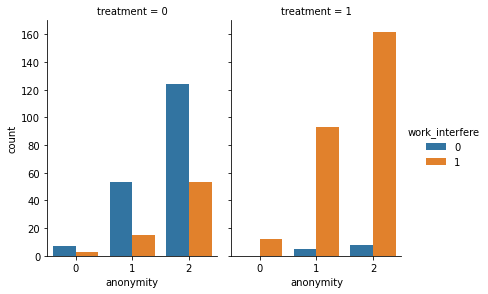

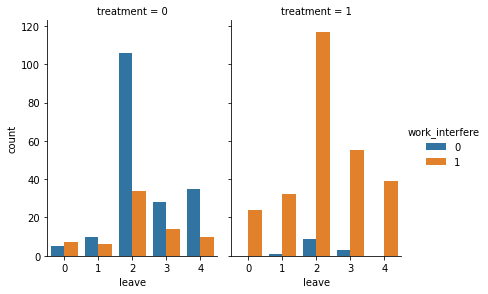

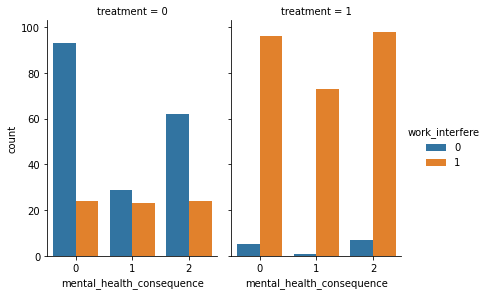

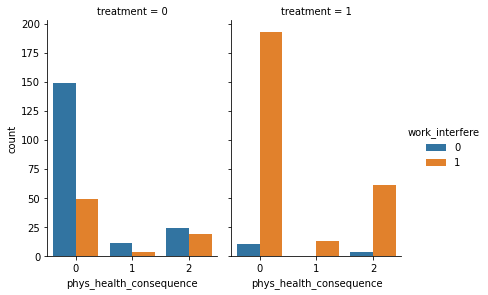

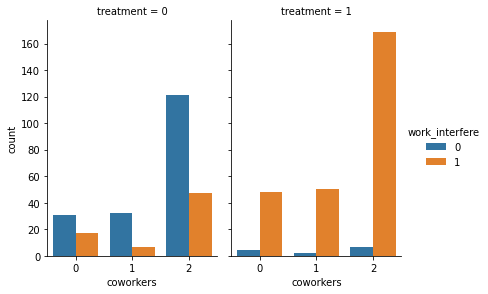

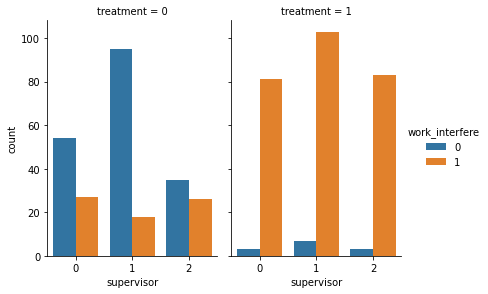

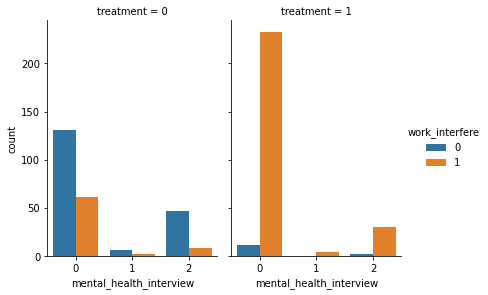

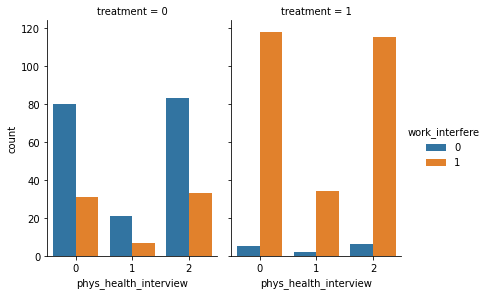

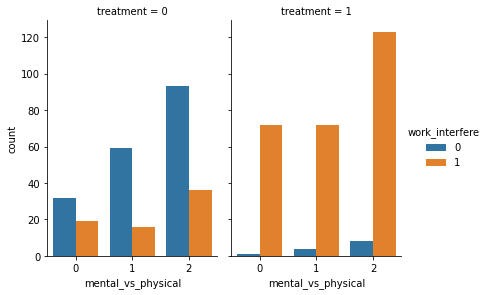

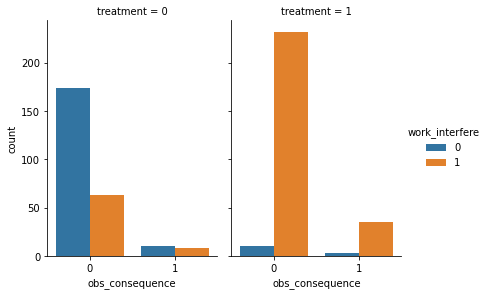

In [40]:
for col in col_list:
    three_chi(encoded_train, 'treatment', 'work_interfere', col)

Controlling for company_size = 0

work_interfere & gender chi2 test results

chi^2 = 1.82
    p = 0.1779

------------------------------------
Controlling for company_size = 1

work_interfere & gender chi2 test results

chi^2 = 1.91
    p = 0.3845

------------------------------------
Controlling for company_size = 2

work_interfere & gender chi2 test results

chi^2 = 8.71
    p = 0.0128

------------------------------------
Controlling for company_size = 3

work_interfere & gender chi2 test results

chi^2 = 0.01
    p = 0.9306

------------------------------------
Controlling for company_size = 4

work_interfere & gender chi2 test results

chi^2 = 2.64
    p = 0.1044

------------------------------------
Controlling for company_size = 5

work_interfere & gender chi2 test results

chi^2 = 3.53
    p = 0.1715

------------------------------------
Controlling for company_size = 0

work_interfere & self_employed chi2 test results

chi^2 = 1.92
    p = 0.1660

-----------------------------

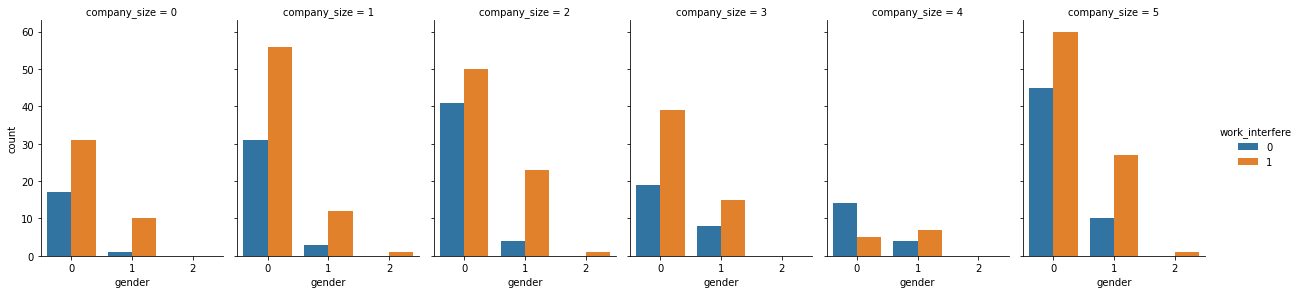

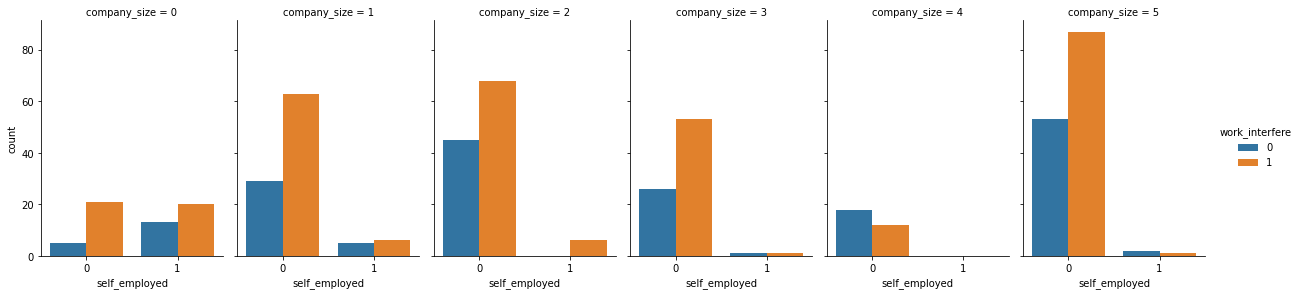

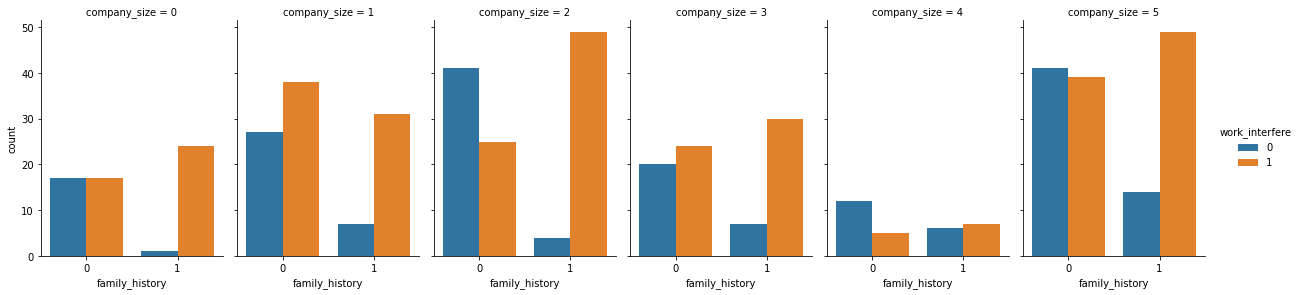

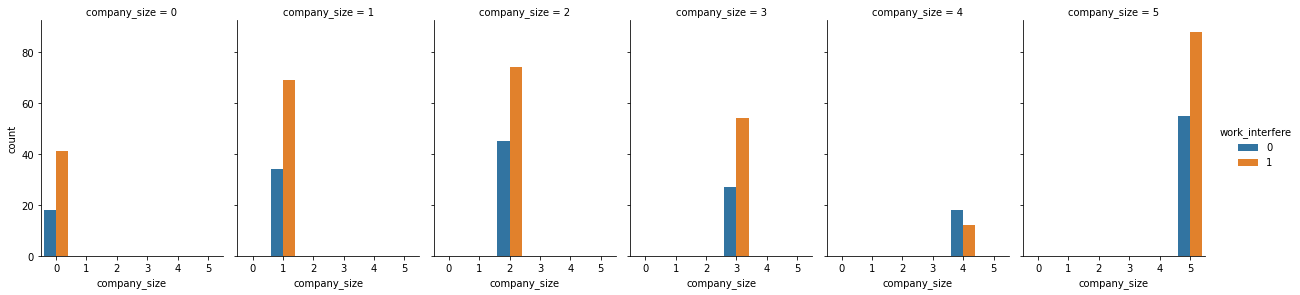

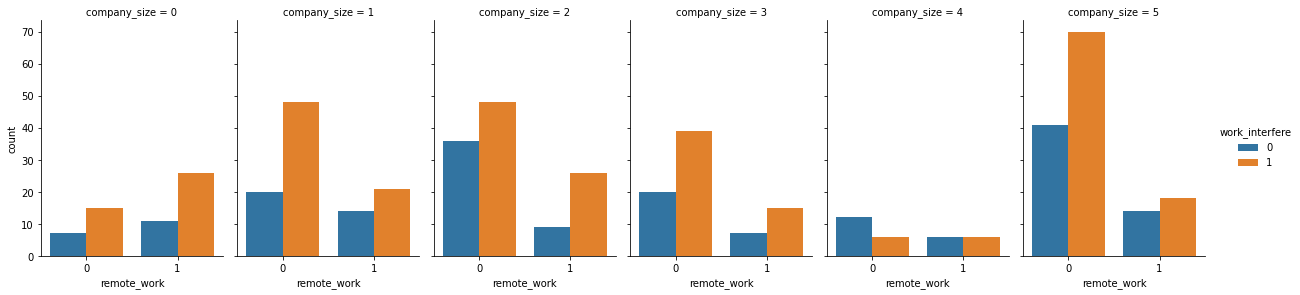

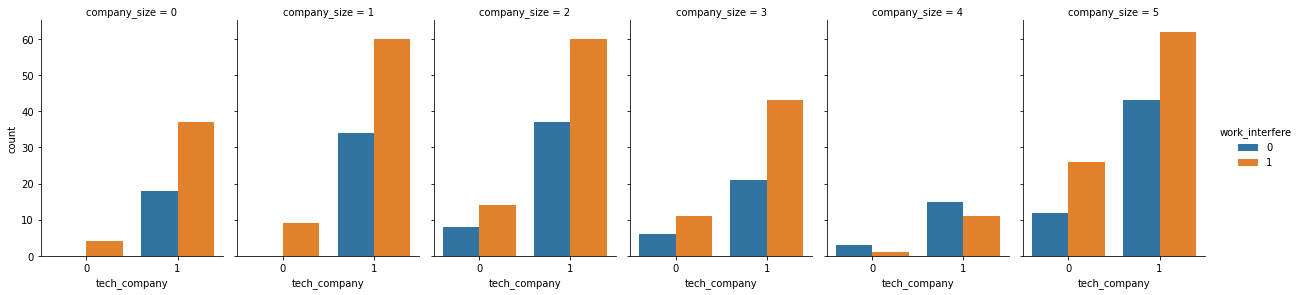

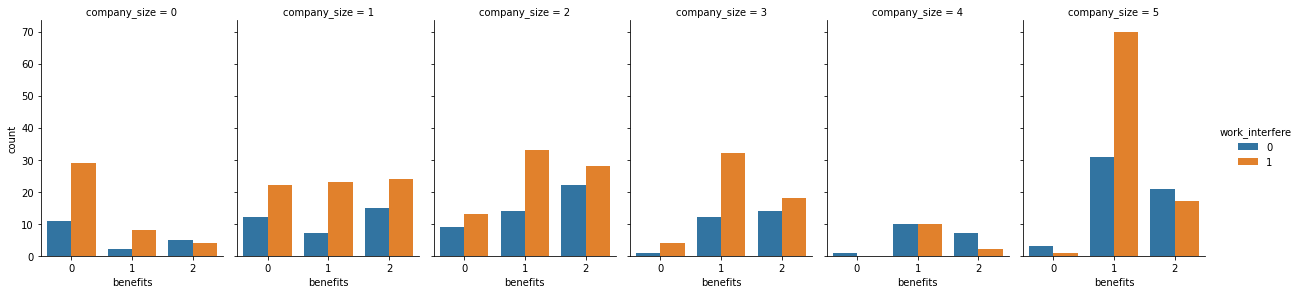

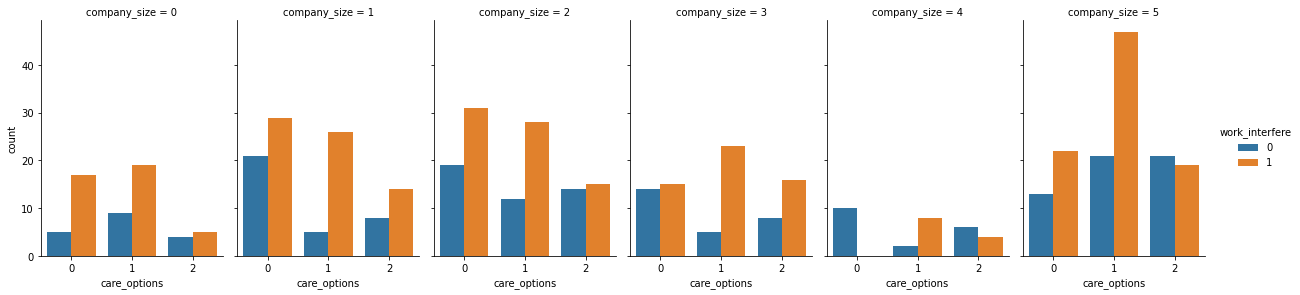

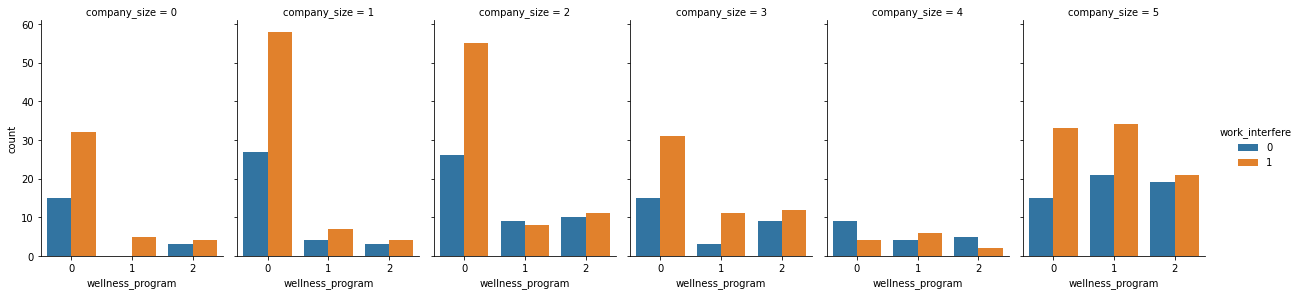

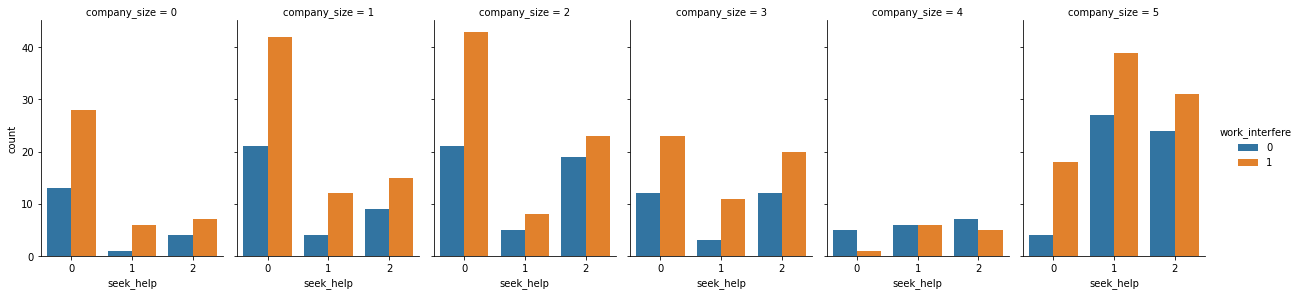

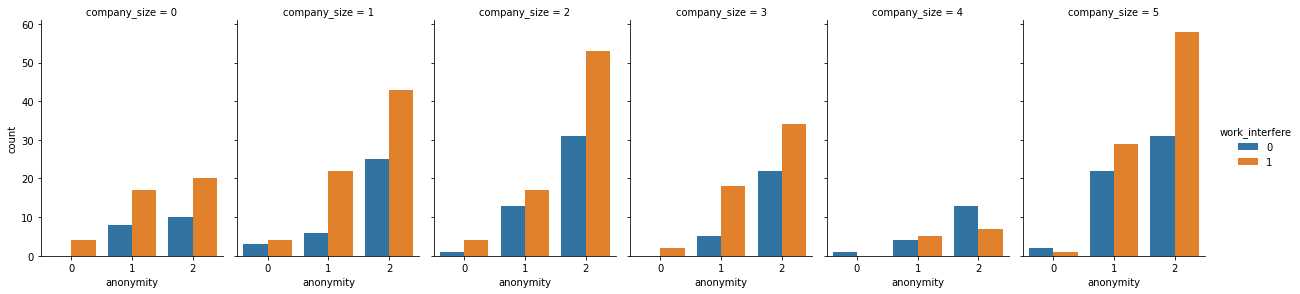

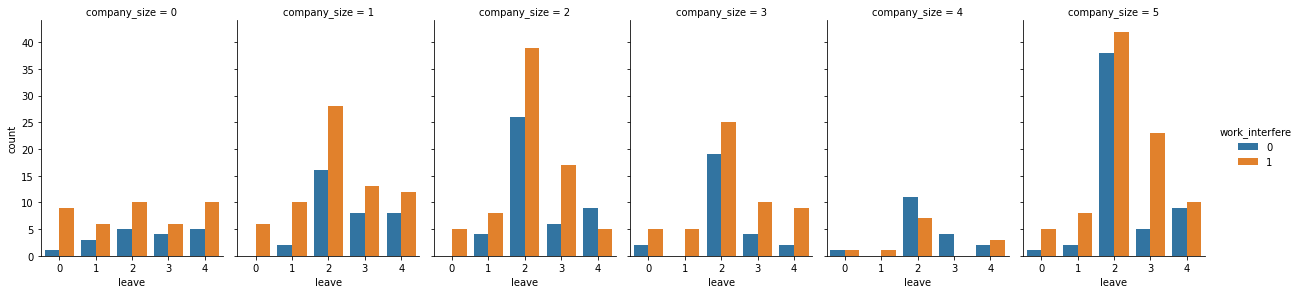

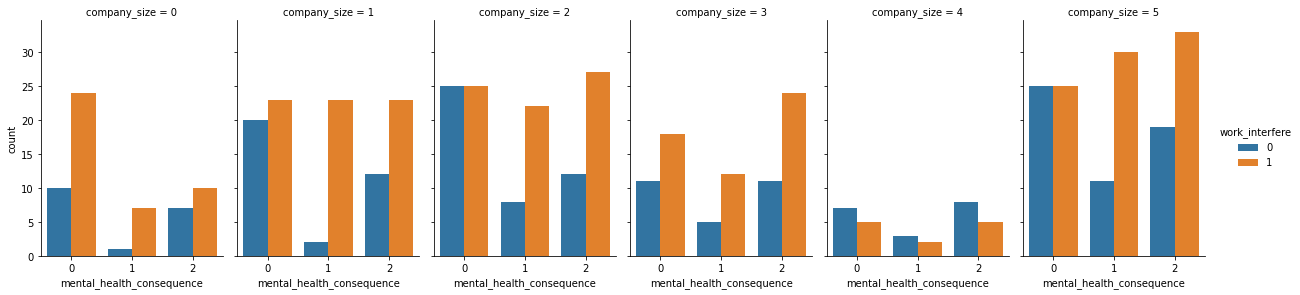

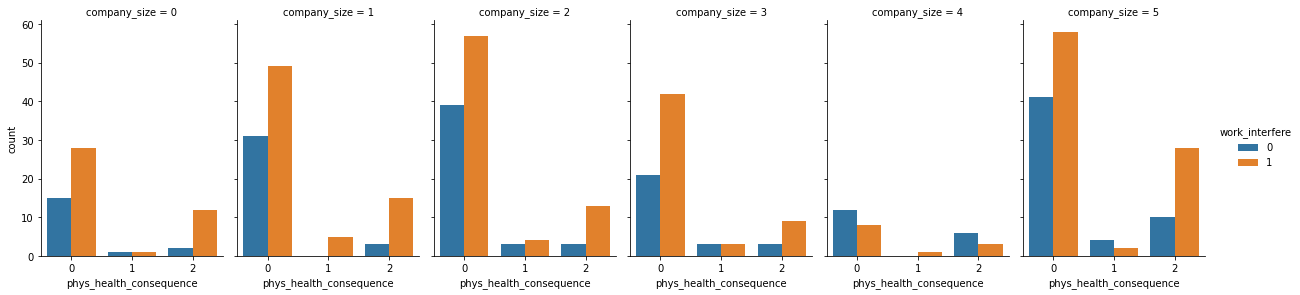

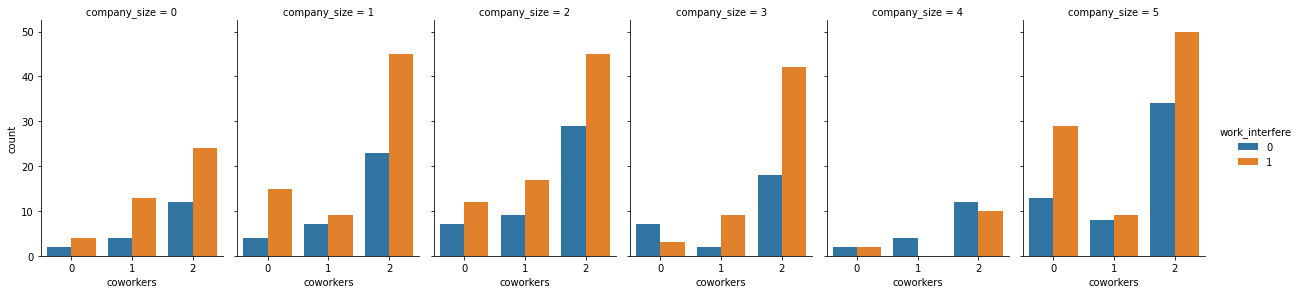

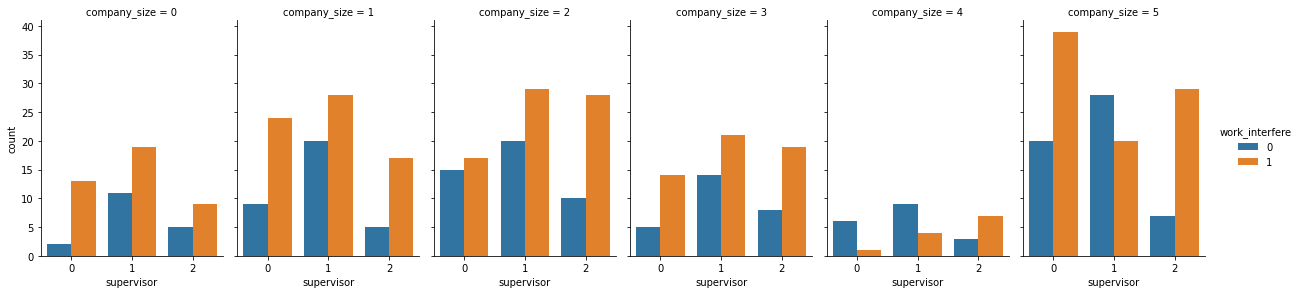

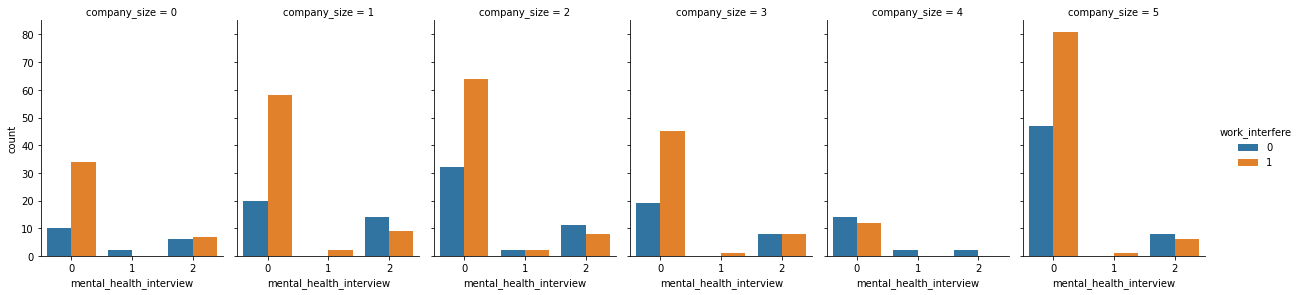

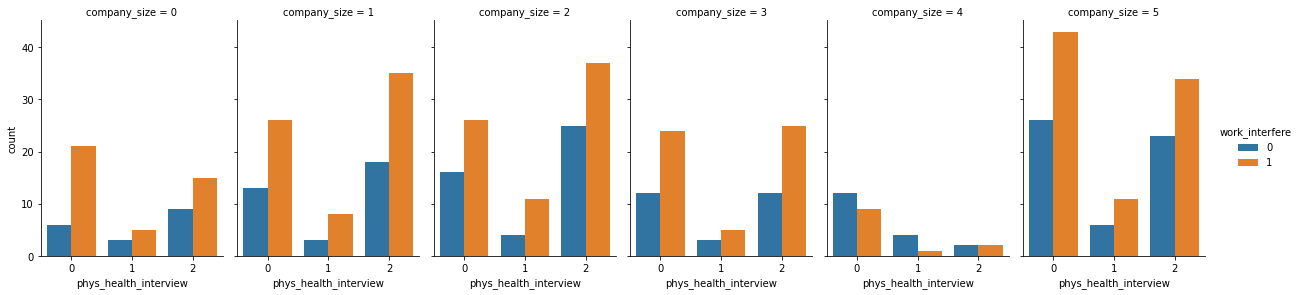

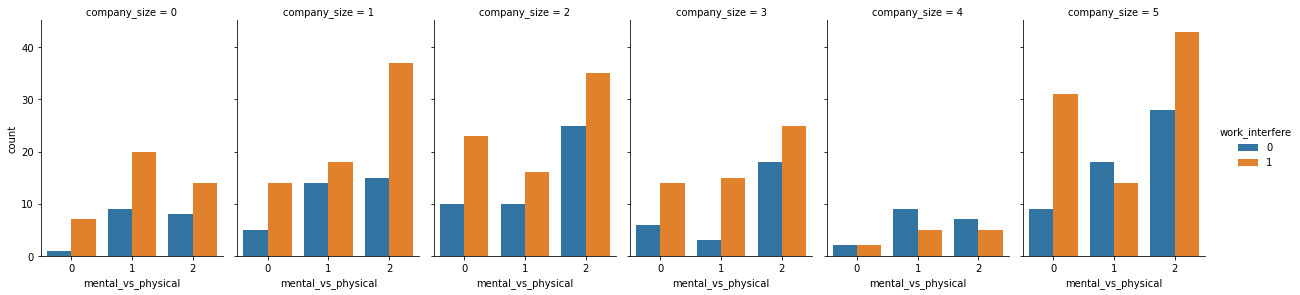

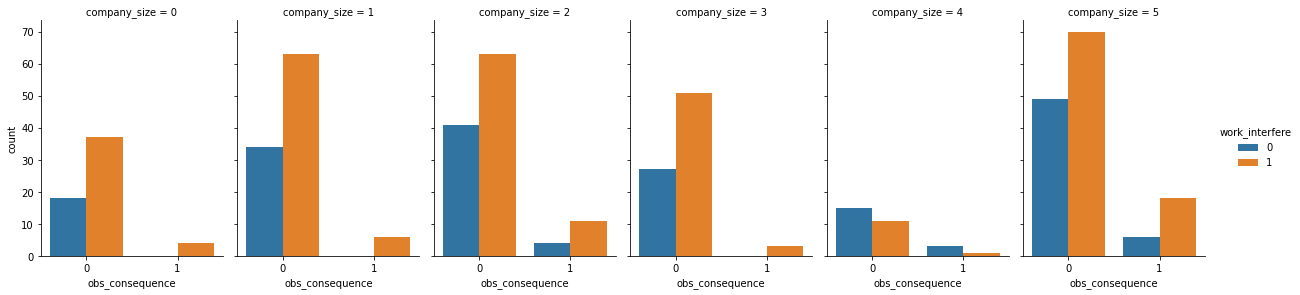

In [41]:
for col in col_list:
    three_chi(encoded_train, 'company_size', 'work_interfere', col)

Controlling for treatment = 0

work_interfere & leave chi2 test results

chi^2 = 8.52
    p = 0.0744

------------------------------------
Controlling for treatment = 1

work_interfere & leave chi2 test results

chi^2 = 5.08
    p = 0.2795

------------------------------------


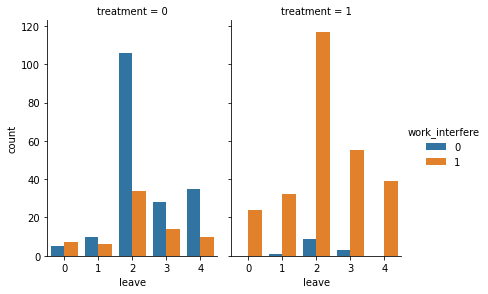

In [44]:
three_chi(encoded_train, 'treatment', 'work_interfere', 'leave')

Controlling for gender = 0

work_interfere & supervisor chi2 test results

chi^2 = 13.69
    p = 0.0011

------------------------------------
Controlling for gender = 1

work_interfere & supervisor chi2 test results

chi^2 = 1.38
    p = 0.5009

------------------------------------
Controlling for gender = 2

work_interfere & supervisor chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


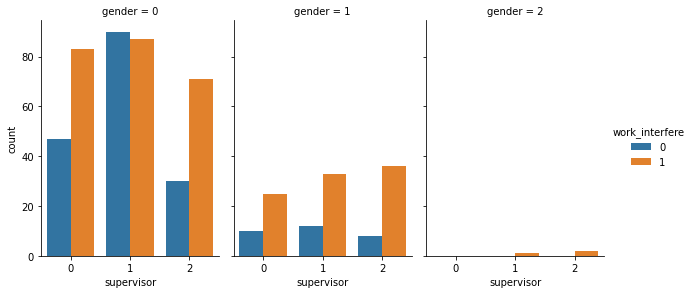

In [41]:
three_chi(encoded_train, 'gender', 'work_interfere', 'supervisor')

In [40]:
def plot_chi(df, control, target, col_2):
    '''
    This function takes in a pandas DataFrame, a control variable, target_variable, and other variable.
    It creates separate DataFrames that control for the control variable.
    '''
    length = len(df[control].value_counts())
    span = range(0,length)
    
    for i in span:
        sub_df = df[df[control]==i]
        print(f'Controlling for {control} = {i}')
        print('')
        ty_chi(sub_df, target, col_2)
        print('')
        print('------------------------------------')
    sns.catplot(data=df, x=col_2, hue=target, col=control, kind='count', height=4, aspect=.7)

Controlling for gender = 0

work_interfere & supervisor chi2 test results

chi^2 = 13.69
    p = 0.0011

------------------------------------
Controlling for gender = 1

work_interfere & supervisor chi2 test results

chi^2 = 1.38
    p = 0.5009

------------------------------------
Controlling for gender = 2

work_interfere & supervisor chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


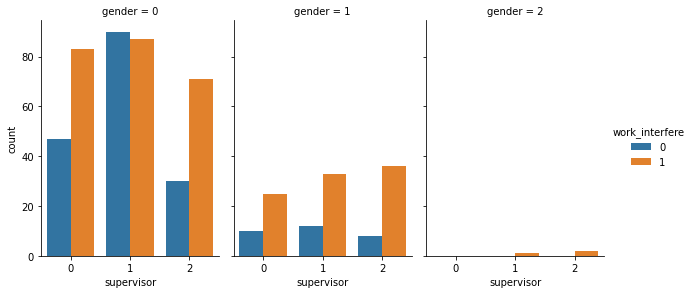

In [41]:
plot_chi(encoded_train, 'gender', 'work_interfere', 'supervisor')

#### Takeaways from `supervisor` and `work_interfere` when controlling for `gender`
- Men who feel comfortable speaking about mental health issues with a supervisor have work place interference at a significantly lower rate than those who either feel uncomfortable, or do not know.
- For women, it surprisingly does not seem to matter how they responded to the 'supervisor' question
- There is not enough data for gender=other to have actionable insight
- We recommend that companies work to improve communication between management and staff, as there is clear evidence that it greatly helps reduce the rate of workplace interference amongst men, and does not harm anyone else.

#### Hypothesis 2: controlling for `gender`, how does `mental_heath_consequence` relate to `work_interfere`
- alpha : 0.05
- ${H_0}$: When controlling for gender, the rate of work interference is the same among all responses to mental_health_consequence
- ${H_a}$: When controlling for gender, the rate of work interference is different among each response to mental_health_consequence

Controlling for gender = 0

work_interfere & mental_health_consequence chi2 test results

chi^2 = 17.55
    p = 0.0002

------------------------------------
Controlling for gender = 1

work_interfere & mental_health_consequence chi2 test results

chi^2 = 8.06
    p = 0.0178

------------------------------------
Controlling for gender = 2

work_interfere & mental_health_consequence chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


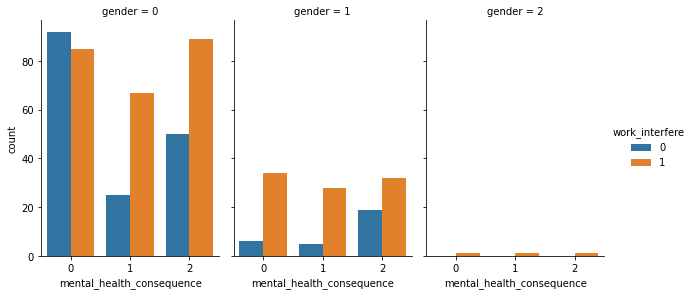

In [42]:
plot_chi(encoded_train, 'gender', 'work_interfere', 'mental_health_consequence')

#### Hypothesis 2 - Key Findings, Takeaways, and Next Steps:
- For men, there is a massive difference in the rate of work interference for those who do not feel there will be consequences for mental health issues and those who either feel there would be consequences or do not know.
- For the women, it does not seem to matter nearly as much.
- Where gender = other, we do not have enough data for actionable insight.

#### Hypothesis 2: controlling for `gender`, how does `mental_vs_physical` relate to `work_interfere`
- alpha : 0.05
- ${H_0}$: When controlling for gender, the rate of work interference is the same among all responses to mental_vs_physical
- ${H_a}$: When controlling for gender, the rate of work interference is different among each response to mental_vs_physical

Controlling for gender = 0

work_interfere & mental_vs_physical chi2 test results

chi^2 = 5.53
    p = 0.0629

------------------------------------
Controlling for gender = 1

work_interfere & mental_vs_physical chi2 test results

chi^2 = 8.01
    p = 0.0183

------------------------------------
Controlling for gender = 2

work_interfere & mental_vs_physical chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


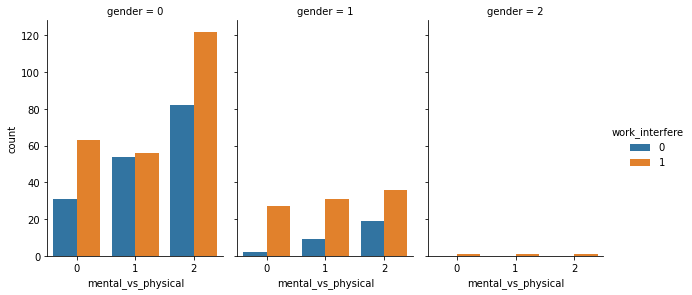

In [43]:
plot_chi(encoded_train, 'gender', 'work_interfere', 'mental_vs_physical')

#### Hypothesis 3 - Key Findings, Takeaways, and Next Steps:
- Men who feel that their company takes mental health as seriously as physical health have work interference at a significantly lower rate than those who do not, or do not know.
- Women who feel that their company takes mental health as seriously as physical health have work interference at a lower rate than those who do not, or do not know.
- Once again, we do not have enough data where gender = other to have actionable insight.

#### Hypothesis 4: controlling for `gender`, how does `anonymity` relate to `work_interfere`
- alpha : 0.05
- ${H_0}$: When controlling for gender, the rate of work interference is the same among all responses to anonymity
- ${H_a}$: When controlling for gender, the rate of work interference is different among each response to anonymity

Controlling for gender = 0

work_interfere & anonymity chi2 test results

chi^2 = 0.51
    p = 0.7764

------------------------------------
Controlling for gender = 1

work_interfere & anonymity chi2 test results

chi^2 = 0.35
    p = 0.8389

------------------------------------
Controlling for gender = 2

work_interfere & anonymity chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


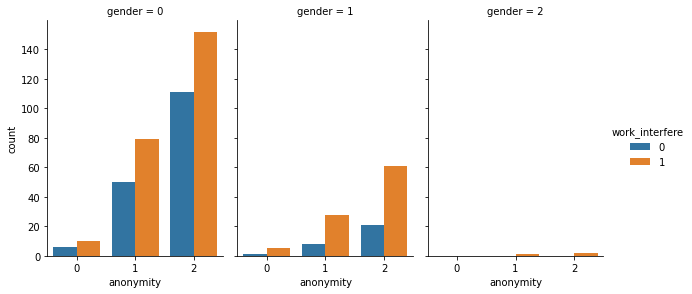

In [44]:
plot_chi(encoded_train, 'gender', 'work_interfere', 'anonymity')

#### Hypothesis 4 - Key Findings, Takeaways, and Next Steps:
- Due to all p-values being higher than alpha, we fail to reject the null hypothesis.
- There is no evidence to suggest a relationship between 'anonymity' and 'work_interfere' when controlling for gender.

#### Hypothesis 5: controlling for `company_size`, how does `supervisor` relate to `work_interfere`
- alpha : 0.05
- ${H_0}$: When controlling for company size, the rate of work interference is the same among all responses to supervisor
- ${H_a}$: When controlling for company size, the rate of work interference is different among each response to supervisor

Controlling for company_size = 0

work_interfere & supervisor chi2 test results

chi^2 = 2.80
    p = 0.2463

------------------------------------
Controlling for company_size = 1

work_interfere & supervisor chi2 test results

chi^2 = 3.17
    p = 0.2050

------------------------------------
Controlling for company_size = 2

work_interfere & supervisor chi2 test results

chi^2 = 3.44
    p = 0.1789

------------------------------------
Controlling for company_size = 3

work_interfere & supervisor chi2 test results

chi^2 = 1.29
    p = 0.5253

------------------------------------
Controlling for company_size = 4

work_interfere & supervisor chi2 test results

chi^2 = 6.14
    p = 0.0464

------------------------------------
Controlling for company_size = 5

work_interfere & supervisor chi2 test results

chi^2 = 14.03
    p = 0.0009

------------------------------------


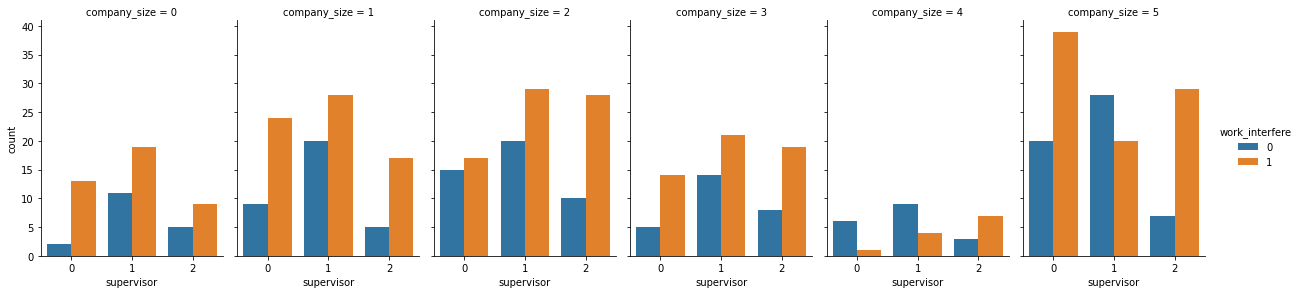

In [45]:
plot_chi(encoded_train, 'company_size', 'work_interfere', 'supervisor')

#### Hypothesis 5 - Key Findings, Takeaways, and Next Steps:
- Very interesting to see that we cannot reject the null for company sizes 3 and smaller, but that it makes a huge difference for company sizes 4 and 5
- At sizes 3 and smaller, the rate of workplace interference among those who feel comfortable speaking to a supervior is still greater than 50 %, but once we get to sizes 4 & 5, we notice that the rate drops well below 50%
- We definitely want to explore what other drivers are involved here, that cause such an decrease in interference once we get up to company sizes 4 & 5

Controlling for phys_health_consequence = 0

work_interfere & phys_health_consequence chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------
Controlling for phys_health_consequence = 1

work_interfere & phys_health_consequence chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------
Controlling for phys_health_consequence = 2

work_interfere & phys_health_consequence chi2 test results

chi^2 = 0.00
    p = 1.0000

------------------------------------


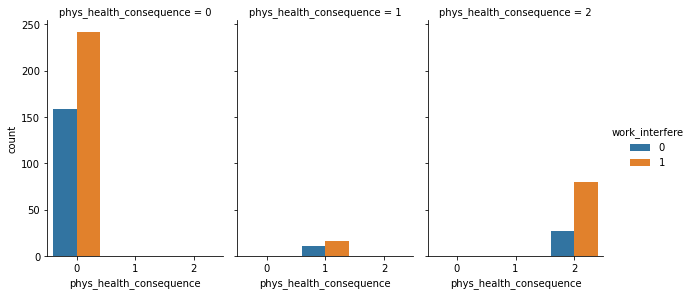

In [46]:
plot_chi(encoded_train, 'phys_health_consequence', 'work_interfere', 'phys_health_consequence')

------

### Explore Key Findings, Takeaways, and Next Steps:

------

## Modeling

### Initital Setup

### Model 1: [insert model name here]

#### Model 1: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 2: [insert model name here]

#### Model 2: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 3: [insert model name here]

#### Model 3: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 4: [insert model name here]

#### Model 4: [insert model name here] - Key Findings, Takeaways, and Next Steps:

------

### Modeling Key Findings, Takeaways, and Next Steps:

------

### Summary - Key Findings, Takeaways, and Next Steps:

------